In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import gzip
import cPickle as pickle
import json

import scipy.stats

from time import strftime

import sys

from collections import Counter
from operator import itemgetter

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../TrainModels')
sys.path.append('../ApplyModels')
sys.path.append('../Utils')
from utils import filter_by_filelist, plot_labelled_bb
from utils import saiapr_image_filename, mscoco_image_filename, separation_plot
from train_model import STOPWORDS, is_relational
from train_model import create_word2den, make_train
from apply_model import make_test

In [2]:
from sklearn.metrics import average_precision_score

In [3]:
from tqdm import tqdm

In [4]:
with gzip.open('../Preproc/PreProcOut/saiapr_refdf.pklz', 'r') as f:
    srefdf = pickle.load(f)


## Splits

with open('../Preproc/PreProcOut/saiapr_90-10_splits.json', 'r') as f:
    ssplit90 = json.load(f)


In [5]:
X = np.load('/Volumes/USB_128GB/Models/2016-v3-image-wac/saiapr.npz')
X = X['arr_0']

In [7]:
with gzip.open('../TrainModels/TrainedModels/model05_sr5r.pklz', 'r') as f:
    wac_05 = pickle.load(f)

In [8]:
wac = wac_05

In [9]:
trefdf = filter_by_filelist(srefdf, ssplit90['train'])

In [13]:
def run_wac_on_data(refdf, X, wac, word, nneg=3, nsrc='random'):
    w2d = create_word2den(refdf, [word])
    if word not in w2d:
        return False, False
    X_t, y_t = make_train(X, w2d, word, nneg, nsrc)
    res = wac[word]['clsf'].predict_proba(X_t)[:,1]
    return np.array(y_t), res

def test_vocab(testdf, X, wac, vocab):
    out = []
    for word in tqdm(vocab):
        y_true, y_score = run_wac_on_data(testdf, X, wac, word)
        if y_score is False:
            continue
        auc = (average_precision_score(y_true, y_score))
        pos = wac[word]['npos']
        out.append((word, auc, pos))
    return out

In [23]:
average_precision_score(*run_wac_on_data(trefdf, X, wac, 'water'))

more than one feature vec for this region (27000, 4)!
skipping all of it


0.80783995170953549

In [24]:
average_precision_score(*run_wac_on_data(trefdf, X, wac, 'white'))

0.48812499200606818

In [25]:
average_precision_score(*run_wac_on_data(trefdf, X, wac, 'yellow'))

0.57636869798952806

In [14]:
test_vocab(trefdf, X, wac, ['boy', 'girl'])

[('boy', 0.79471755821090984, 2177), ('girl', 0.71328503310675773, 6108)]

In [15]:
len(wac.keys())

793

In [16]:
all_aucs = test_vocab(trefdf, X, wac, wac.keys())

  4%|▍         | 34/793 [05:56<2:12:40,  0.10it/s]

more than one feature vec for this region (27000, 3)!
skipping all of it
more than one feature vec for this region (8103, 3)!

  6%|▌         | 46/793 [07:48<2:06:55,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 8)!

  6%|▌         | 49/793 [08:35<2:10:27,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 3)!
skipping all of it
more than one feature vec for this region (19579, 2)!

  9%|▉         | 73/793 [12:30<2:03:22,  0.10it/s]


skipping all of it
more than one feature vec for this region (19575, 1)!

 10%|▉         | 78/793 [13:13<2:01:11,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 4)!

 14%|█▎        | 109/793 [17:51<1:52:02,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 9)!

 17%|█▋        | 133/793 [21:29<1:46:37,  0.10it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!

 18%|█▊        | 140/793 [23:17<1:48:39,  0.10it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!

 21%|██        | 164/793 [26:27<1:41:28,  0.10it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!
skipping all of it
more than one feature vec for this region (19579, 1)!
skipping all of it
more than one feature vec for this region (27000, 9)!
skipping all of it
more than one feature vec for this region (27000, 9)!
skipping all of it
more than one feature vec for this region (27000, 9)!
skipping all of it
more than one feature vec for this region (9873, 10)!

 23%|██▎       | 184/793 [29:28<1:37:32,  0.10it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!

 24%|██▍       | 190/793 [30:35<1:37:06,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 3)!

 28%|██▊       | 226/793 [36:04<1:30:29,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 3)!
skipping all of it
more than one feature vec for this region (27000, 3)!
skipping all of it
more than one feature vec for this region (27000, 7)!

 32%|███▏      | 251/793 [39:05<1:24:25,  0.11it/s]


skipping all of it
more than one feature vec for this region (27000, 3)!

 38%|███▊      | 302/793 [46:08<1:15:01,  0.11it/s]


skipping all of it
more than one feature vec for this region (8103, 3)!

 40%|███▉      | 314/793 [47:41<1:12:45,  0.11it/s]


skipping all of it
more than one feature vec for this region (19575, 2)!

 45%|████▍     | 353/793 [54:19<1:07:43,  0.11it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!

 45%|████▌     | 358/793 [55:24<1:07:19,  0.11it/s]


skipping all of it
more than one feature vec for this region (19575, 2)!

 47%|████▋     | 371/793 [57:04<1:04:54,  0.11it/s]


skipping all of it
more than one feature vec for this region (19575, 2)!

 47%|████▋     | 372/793 [57:19<1:04:52,  0.11it/s]


skipping all of it
more than one feature vec for this region (27000, 8)!

 47%|████▋     | 375/793 [57:52<1:04:30,  0.11it/s]


skipping all of it
more than one feature vec for this region (27000, 7)!
skipping all of it
more than one feature vec for this region (19575, 2)!

 47%|████▋     | 376/793 [58:03<1:04:22,  0.11it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!

 50%|█████     | 398/793 [1:00:55<1:00:28,  0.11it/s]


skipping all of it
more than one feature vec for this region (27000, 7)!
skipping all of it
more than one feature vec for this region (27000, 2)!
skipping all of it
more than one feature vec for this region (19579, 2)!

 53%|█████▎    | 418/793 [1:08:21<1:01:19,  0.10it/s]


skipping all of it
more than one feature vec for this region (8103, 3)!

 62%|██████▏   | 488/793 [1:17:22<48:21,  0.11it/s]


skipping all of it
more than one feature vec for this region (19575, 2)!

 67%|██████▋   | 530/793 [1:23:04<41:13,  0.11it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!

 72%|███████▏  | 574/793 [1:30:35<34:33,  0.11it/s]


skipping all of it
more than one feature vec for this region (8103, 3)!

 74%|███████▍  | 586/793 [1:32:19<32:36,  0.11it/s]


skipping all of it
more than one feature vec for this region (27000, 3)!

 76%|███████▌  | 601/793 [1:34:42<30:15,  0.11it/s]


skipping all of it
more than one feature vec for this region (27000, 8)!

 77%|███████▋  | 610/793 [1:36:13<28:52,  0.11it/s]


skipping all of it
more than one feature vec for this region (27000, 7)!
skipping all of it
more than one feature vec for this region (8103, 3)!

 77%|███████▋  | 611/793 [1:36:21<28:42,  0.11it/s]


skipping all of it
more than one feature vec for this region (8103, 3)!
skipping all of it
more than one feature vec for this region (8103, 3)!
skipping all of it
more than one feature vec for this region (27000, 5)!
skipping all of it
more than one feature vec for this region (19579, 2)!
skipping all of it
more than one feature vec for this region (19579, 1)!
skipping all of it
more than one feature vec for this region (19579, 1)!
skipping all of it
more than one feature vec for this region (8103, 1)!

 78%|███████▊  | 619/793 [1:39:12<27:53,  0.10it/s]


skipping all of it
more than one feature vec for this region (9873, 10)!

 81%|████████  | 642/793 [1:42:12<24:02,  0.10it/s]


skipping all of it
more than one feature vec for this region (8103, 3)!

 83%|████████▎ | 655/793 [1:44:05<21:55,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 8)!
skipping all of it
more than one feature vec for this region (27000, 9)!
skipping all of it
more than one feature vec for this region (9873, 10)!
skipping all of it
more than one feature vec for this region (19575, 2)!

 83%|████████▎ | 658/793 [1:48:27<22:15,  0.10it/s]


skipping all of it
more than one feature vec for this region (8103, 2)!

 87%|████████▋ | 688/793 [1:52:54<17:13,  0.10it/s]


skipping all of it
more than one feature vec for this region (8103, 3)!
skipping all of it
more than one feature vec for this region (27000, 8)!
skipping all of it
more than one feature vec for this region (27000, 7)!
skipping all of it
more than one feature vec for this region (27000, 3)!
skipping all of it
more than one feature vec for this region (19575, 2)!

 87%|████████▋ | 690/793 [1:56:11<17:20,  0.10it/s]


skipping all of it
more than one feature vec for this region (19575, 2)!
skipping all of it
more than one feature vec for this region (19579, 1)!

 89%|████████▉ | 705/793 [2:00:25<15:01,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 3)!

 91%|█████████▏| 724/793 [2:02:53<11:42,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 6)!

 92%|█████████▏| 729/793 [2:03:40<10:51,  0.10it/s]


skipping all of it
more than one feature vec for this region (19579, 1)!
skipping all of it
more than one feature vec for this region (8103, 3)!

 95%|█████████▌| 754/793 [2:06:54<06:33,  0.10it/s]


skipping all of it
more than one feature vec for this region (19579, 2)!

 97%|█████████▋| 767/793 [2:08:39<04:21,  0.10it/s]


skipping all of it
more than one feature vec for this region (19575, 2)!

 97%|█████████▋| 770/793 [2:09:01<03:51,  0.10it/s]


skipping all of it
more than one feature vec for this region (19575, 2)!

 99%|█████████▉| 784/793 [2:11:17<01:30,  0.10it/s]


skipping all of it
more than one feature vec for this region (27000, 1)!


skipping all of it
more than one feature vec for this region (27000, 2)!
skipping all of it


In [100]:
#with gzip.open('all_aucs.pklz', 'w') as f:
#    pickle.dump(all_aucs, f)

In [19]:
all_aucs[:10]

[('all', 0.46921299692199064, 818),
 ('partial', 0.76674857770953686, 376),
 ('pointing', 0.72670135850368411, 96),
 ('both', 0.88474729575043998, 43),
 ('focus', 1.0, 42),
 ('yellow', 0.57607208377305086, 2518),
 ('four', 0.69444339686515433, 47),
 ('spiders', 0.52922582307430022, 97),
 ('railing', 0.84470974562278656, 85),
 ('dish', 0.88492417097923393, 230)]

In [24]:
auc_dic = {w:s for w,s,_ in all_aucs}

In [25]:
auc_dic['spiders']

0.52922582307430022

In [45]:
auc_dic['white'], auc_dic['black'], auc_dic['red'], auc_dic['yellow'], auc_dic['green']

(0.47944384855538064,
 0.55288787415413687,
 0.66874076240980218,
 0.57607208377305086,
 0.55811615151335103)

In [34]:
auc_sorted = np.array(sorted([(w,s,p) for w,s,p in all_aucs], key=itemgetter(1), reverse=True))

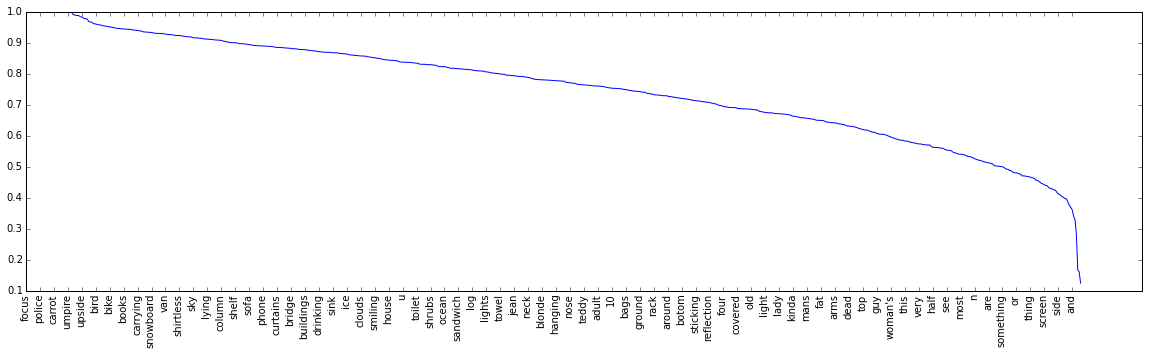

In [41]:
plt.figure(figsize=(20,5))
plt.plot(range(len(auc_sorted)), auc_sorted[:,1])
xs_thinned = range(0,len(auc_sorted), 10)
xtick_labels = auc_sorted[:,0][xs_thinned]
_ = plt.xticks(xs_thinned, xtick_labels, rotation='vertical')

In [43]:
auc_sorted[-50:,]

array([['those', '0.484657846386', '51'],
       ['edge', '0.481469283592', '654'],
       ['there', '0.480812234607', '69'],
       ['or', '0.480419696271', '302'],
       ['white', '0.479443848555', '9222'],
       ['-', '0.477194281409', '125'],
       ['little', '0.476280723571', '673'],
       ['them', '0.470851016589', '68'],
       ['barely', '0.470724562921', '89'],
       ['brown', '0.470569392013', '1983'],
       ['all', '0.469212996922', '818'],
       ['mid', '0.468982058216', '149'],
       ['is', '0.468374556651', '1473'],
       ['thing', '0.466602278181', '1432'],
       ['dark', '0.464630552502', '983'],
       ['watching', '0.463965201465', '41'],
       ['by', '0.462214624307', '829'],
       ['floral', '0.457154882155', '42'],
       ['back', '0.455990025579', '4965'],
       ['with', '0.453852798792', '7407'],
       ['other', '0.450235741234', '113'],
       ['near', '0.446271572863', '907'],
       ['two', '0.444869876129', '350'],
       ['screen', '0.441700738

In [46]:
auc_sorted[:50,]

array([['focus', '1.0', '42'],
       ['dessert', '1.0', '62'],
       ['kitty', '1.0', '52'],
       ['uniform', '1.0', '74'],
       ['soldier', '1.0', '54'],
       ['rice', '1.0', '70'],
       ['soup', '1.0', '55'],
       ['elephant', '1.0', '2230'],
       ['lamb', '1.0', '103'],
       ['oven', '1.0', '149'],
       ['police', '1.0', '62'],
       ['sauce', '1.0', '70'],
       ['dad', '1.0', '74'],
       ['skater', '1.0', '78'],
       ['zebra', '1.0', '2102'],
       ['mostly', '1.0', '41'],
       ['12', '1.0', '41'],
       ['bride', '1.0', '194'],
       ['carrots', '1.0', '132'],
       ['camo', '1.0', '48'],
       ['carrot', '1.0', '211'],
       ['batter', '1.0', '1008'],
       ['polka', '1.0', '60'],
       ['cop', '1.0', '92'],
       ['bull', '1.0', '46'],
       ['mother', '1.0', '42'],
       ['traffic', '1.0', '57'],
       ['doughnut', '1.0', '147'],
       ['cutoff', '1.0', '66'],
       ['cycle', '1.0', '62'],
       ['umpire', '1.0', '364'],
       ['pie', 

In [53]:
y_t, y_s = run_wac_on_data(trefdf, X, wac, 'dessert')

In [55]:
y_t, y_s, average_precision_score(y_t, y_s)

(array([ True, False, False, False], dtype=bool),
 array([  7.29804020e-01,   5.75950503e-03,   1.29903665e-03,
          2.25057720e-04]),
 1.0)

In [56]:
w2d_full = create_word2den(trefdf, wac.keys())

In [59]:
len([w for w, frids in w2d_full.items() if len(frids) > 20])

589

In [61]:
reliable_words = [w for w, frids in w2d_full.items() if len(frids) > 20]

In [66]:
r_auc_sorted = np.array(sorted([(w,s,p) for w,s,p in all_aucs if w in reliable_words],
                               key=itemgetter(1), reverse=True))

In [67]:
r_auc_sorted

array([['giraffe', '0.9968227466', '1800'],
       ['coffee', '0.990395667551', '111'],
       ['court', '0.989968296046', '104'],
       ..., 
       ['to', '0.340703665072', '4746'],
       ['just', '0.329639040981', '254'],
       ['of', '0.282806154756', '10340']], 
      dtype='|S14')

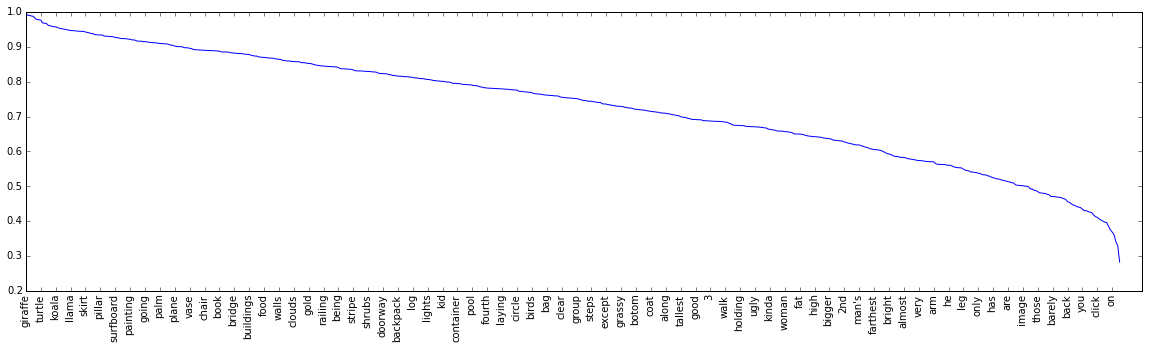

In [72]:
plt.figure(figsize=(20,5))
plt.plot(range(len(r_auc_sorted)), r_auc_sorted[:,1])
xs_thinned = range(0,len(r_auc_sorted), 8)
xtick_labels = r_auc_sorted[:,0][xs_thinned]
_ = plt.xticks(xs_thinned, xtick_labels, rotation='vertical')

In [84]:
np.mean(r_auc_sorted[:,1].astype('f')), np.std(r_auc_sorted[:,1].astype('f'))

(0.73101622, 0.15192689)

In [85]:
r_auc_sorted[:30]

array([['giraffe', '0.9968227466', '1800'],
       ['coffee', '0.990395667551', '111'],
       ['court', '0.989968296046', '104'],
       ['riding', '0.988140344909', '84'],
       ['penguin', '0.987433886418', '65'],
       ['balloon', '0.98085032271', '59'],
       ['ball', '0.977900679447', '266'],
       ['mug', '0.97763707741', '155'],
       ['turtle', '0.976485014634', '55'],
       ['tennis', '0.968352609601', '237'],
       ['beer', '0.967630853088', '197'],
       ['seal', '0.966730571118', '203'],
       ['cow', '0.961262187374', '1434'],
       ['bird', '0.960826804609', '1027'],
       ['horse', '0.958366120189', '2423'],
       ['drink', '0.957494730745', '171'],
       ['koala', '0.957112198352', '48'],
       ['sheep', '0.955287895552', '968'],
       ['ceiling', '0.953039967671', '217'],
       ['parrot', '0.951885970536', '45'],
       ['bike', '0.951151886975', '2138'],
       ['cactus', '0.950033268334', '290'],
       ['sun', '0.948779943226', '169'],
       ['smok

In [86]:
r_auc_sorted[-30:]

array([['by', '0.462214624307', '829'],
       ['back', '0.455990025579', '4965'],
       ['with', '0.453852798792', '7407'],
       ['other', '0.450235741234', '113'],
       ['near', '0.446271572863', '907'],
       ['two', '0.444869876129', '350'],
       ['screen', '0.441700738843', '760'],
       ['so', '0.440192588958', '96'],
       ['front', '0.438905667654', '8360'],
       ['you', '0.43426550133', '631'],
       ['photo', '0.430418593808', '390'],
       ['up', '0.4301773546', '968'],
       ['one', '0.427578892011', '1611'],
       ['it', '0.425775816502', '749'],
       ['space', '0.42458141973', '100'],
       ['okay', '0.417971404284', '70'],
       ['side', '0.412871708769', '3682'],
       ['click', '0.411138646539', '474'],
       ['part', '0.406254823725', '1317'],
       ['pic', '0.40327691231', '956'],
       ['at', '0.40006885769', '2797'],
       ['that', '0.397400894274', '1034'],
       ['area', '0.396304236499', '1021'],
       ['directly', '0.385765950991', '4

In [92]:
top = [w for w,s,_ in r_auc_sorted if float(s) > 0.85]
len(top)
print top

['giraffe', 'coffee', 'court', 'riding', 'penguin', 'balloon', 'ball', 'mug', 'turtle', 'tennis', 'beer', 'seal', 'cow', 'bird', 'horse', 'drink', 'koala', 'sheep', 'ceiling', 'parrot', 'bike', 'cactus', 'sun', 'smoke', 'llama', 'fruit', 'ruins', 'waterfall', 'nightstand', 'books', 'night', 'coke', 'skirt', 'leaf', 'wheel', 'label', 'pot', 'animals', 'cup', 'tablecloth', 'pillar', 'flag', 'field', 'monkey', 'bowl', 'curtain', 'plate', 'van', 'surfboard', 'bottle', 'fish', 'umbrella', 'bus', 'shirtless', 'train', 'bed', 'painting', 'lamp', 'metal', 'paper', 'sky', 'luggage', 'player', 'face', 'going', 'desk', 'ship', 'raft', 'lying', 'vehicle', 'trunk', 'couch', 'palm', 'dress', 'doors', 'fountain', 'column', 'cars', 'flowers', 'tire', 'plane', 'against', 'bunch', 'car', 'shelf', 'bunk', 'boat', 'dog', 'vase', 'animal', 'pack', 'anyone', 'clock', 'glass', 'tile', 'window', 'chair', 'phone', 'across', 'cake', 'branches', 'bicycle', 'snow', 'windows', 'book', 'curtains', 'bear', 'guitar',

In [93]:
bottom = [w for w,s,_ in r_auc_sorted if float(s) < 0.60]
len(bottom)
print bottom

['shadow', "woman's", 'was', 'bright', 'lol', 'blue', 'her', 'yes', 'blk', 'this', 'from', 'almost', 'colored', 'looking', 'lighter', 'far', 'foreground', 'yellow', 'looks', 'very', 'second', 'its', 'dat', 'stack', 'dudes', 'men', 'him', 'arm', 'smaller', 'half', 'piece', 'out', 'item', 'line', 'stuff', 'he', 'spot', 'green', 'head', 'see', 'be', 'black', 'think', 'leg', 'way', 'women', 'furthest', 'rt', 'most', 'big', 'grey', 'only', 'like', 'corner', 'picture', 'shoulder', 'no', 'spiders', 'n', 'has', 'his', 'we', 'bit', 'spider', 'guys', '2', 'portion', 'are', 'section', 'us', 'towards', 'sorry', 'where', 'small', 'gray', 'image', 'but', 'something', 'center', 'i', 'closest', 'first', 'middle', 'those', 'edge', 'there', 'or', 'white', '-', 'little', 'them', 'barely', 'brown', 'all', 'mid', 'is', 'thing', 'dark', 'by', 'back', 'with', 'other', 'near', 'two', 'screen', 'so', 'front', 'you', 'photo', 'up', 'one', 'it', 'space', 'okay', 'side', 'click', 'part', 'pic', 'at', 'that', 'are

In [98]:
colours = ['white', 'black', 'red', 'green', 'blue', 'yellow', 'purple', 'pink']
c_s = [float(s) for w,s,_ in r_auc_sorted if w in colours]
np.mean(c_s), np.std(c_s)

(0.60635262576562499, 0.07944093779771419)

In [99]:
positions = 'left right middle center front back'.split()
p_s = [float(s) for w,s,_ in r_auc_sorted if w in positions]
np.mean(p_s), np.std(p_s)

(0.53986584303850005, 0.10027611596073593)